In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path
import re

## Comparing Humorous Lines with Non-Humorous Lines


In [2]:
def words(txt): 
    txt = str(txt)
    return re.findall(r"['\w]+", txt.lower())

In [3]:
numberOfWords = {
    "Humorous Lines": [],
    "Non-Humorous Lines": []
}
characters = {}

directory = Path("cleaned-data")

for file_path in directory.rglob('*'):
    if file_path.is_file() and file_path.suffix == '.json':
        with open(file_path, 'r') as rFile:
            data = json.load(rFile)
            for start_time, info in data.items():
                dialog = info["Dialogue"]
                characterSpeaking = info["Speaker"]
                if characterSpeaking not in characters:
                    characters[characterSpeaking] = {
                        "HumorLinesNWords": [],
                        "NonHumorLinesNWords": [],
                    }
                wordsList = words(dialog)
                # if info["EpisodeID"].startswith("The Big Bang_S0101"):
                if "isHumor" in info.keys():
                    numberOfWords["Humorous Lines"].append(len(wordsList))
                    characters[characterSpeaking]["HumorLinesNWords"].append(len(wordsList))
                else:
                    numberOfWords["Non-Humorous Lines"].append(len(wordsList))
                    characters[characterSpeaking]["NonHumorLinesNWords"].append(len(wordsList))
                    
                    

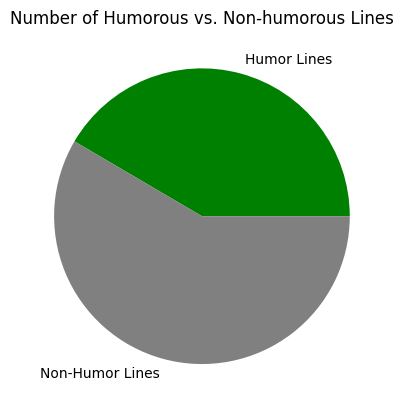

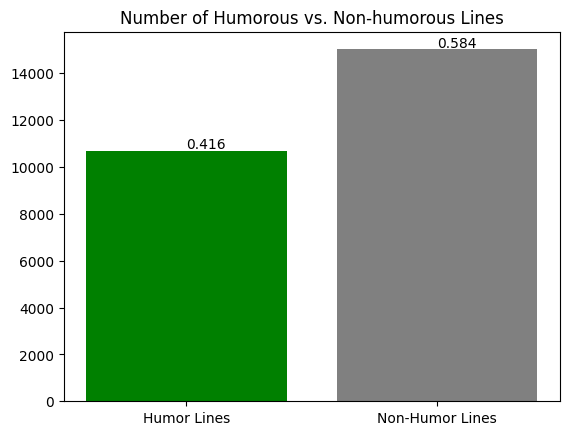

In [4]:
# Pie or bar chart of humorous to non-humorous lines
pie_data = {
    "Humor Lines": len(numberOfWords["Humorous Lines"]),
    "Non-Humor Lines": len(numberOfWords["Non-Humorous Lines"])
}

plt.pie(
    pie_data.values(),
    labels=pie_data.keys(),
    colors=["green", "grey"]
)

plt.title("Number of Humorous vs. Non-humorous Lines")

plt.show()
plt.bar(
    pie_data.keys(),
    pie_data.values(),
    # np.array(list(pie_data.values())) / sum(list(pie_data.values())),
    color=["green", "grey"]
)
for x, y in pie_data.items():
    plt.text(x, y+100, round(y / sum(list(pie_data.values())), 3))
plt.title("Number of Humorous vs. Non-humorous Lines")
plt.show()

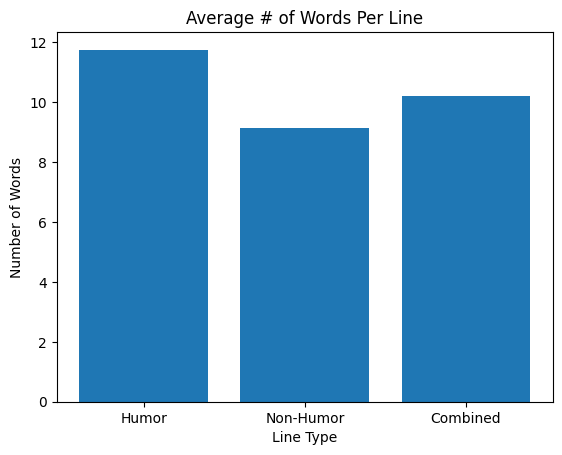

In [5]:
# bar chart comparing avg # of words in humorous, non-humorous, and all lines
avgNWords = {
    "Humor": np.array(numberOfWords["Humorous Lines"]).mean(),
    "Non-Humor": np.array(numberOfWords["Non-Humorous Lines"]).mean(),
    "Combined": np.array(numberOfWords["Humorous Lines"] + numberOfWords["Non-Humorous Lines"]).mean()
}

plt.bar(
    avgNWords.keys(),
    avgNWords.values(),
)

plt.title("Average # of Words Per Line")
plt.xlabel("Line Type")
plt.ylabel("Number of Words")
plt.show()


In [ ]:
# Histogram of Humor Durations

In [ ]:
# Histogram of humorous and non-humorous line durationsp